![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [59]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


# Exploración datos

In [60]:
#Hacemos exploracion de datos para ver el tipo de nuestros datos
display(penguins_df.columns)
display(penguins_df.info)
display(penguins_df.dtypes)

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

<bound method DataFrame.info of      culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0                39.1             18.7              181.0       3750.0    MALE
1                39.5             17.4              186.0       3800.0  FEMALE
2                40.3             18.0              195.0       3250.0  FEMALE
3                36.7             19.3              193.0       3450.0  FEMALE
4                39.3             20.6              190.0       3650.0    MALE
..                ...              ...                ...          ...     ...
327              47.2             13.7              214.0       4925.0  FEMALE
328              46.8             14.3              215.0       4850.0  FEMALE
329              50.4             15.7              222.0       5750.0    MALE
330              45.2             14.8              212.0       5200.0  FEMALE
331              49.9             16.1              213.0       5400.0    MALE

[332 rows x 5 colum

culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [61]:
#Hacemos get_dummies para pasar de un objeto a un entero con onehot encoding
penguins_df=pd.get_dummies(penguins_df, dtype='int')
display(penguins_df.dtypes)
penguins_df.head()

culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex_FEMALE             int64
sex_MALE               int64
dtype: object

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
3,36.7,19.3,193.0,3450.0,1,0
4,39.3,20.6,190.0,3650.0,0,1


# Estandarización de datos

In [62]:
#Estandarizamos las variables para poder hacer el cluster de manera adecuada 
scaler = StandardScaler()
model_scaler = scaler.fit_transform(penguins_df)
penguins_procesado = pd.DataFrame(data=model_scaler, columns = penguins_df.columns)
penguins_procesado.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.903906,0.790360,-1.425342,-0.566948,-0.993994,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,1.006042,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,1.006042,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,1.006042,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,-0.993994,0.993994


# Numero de Clusters

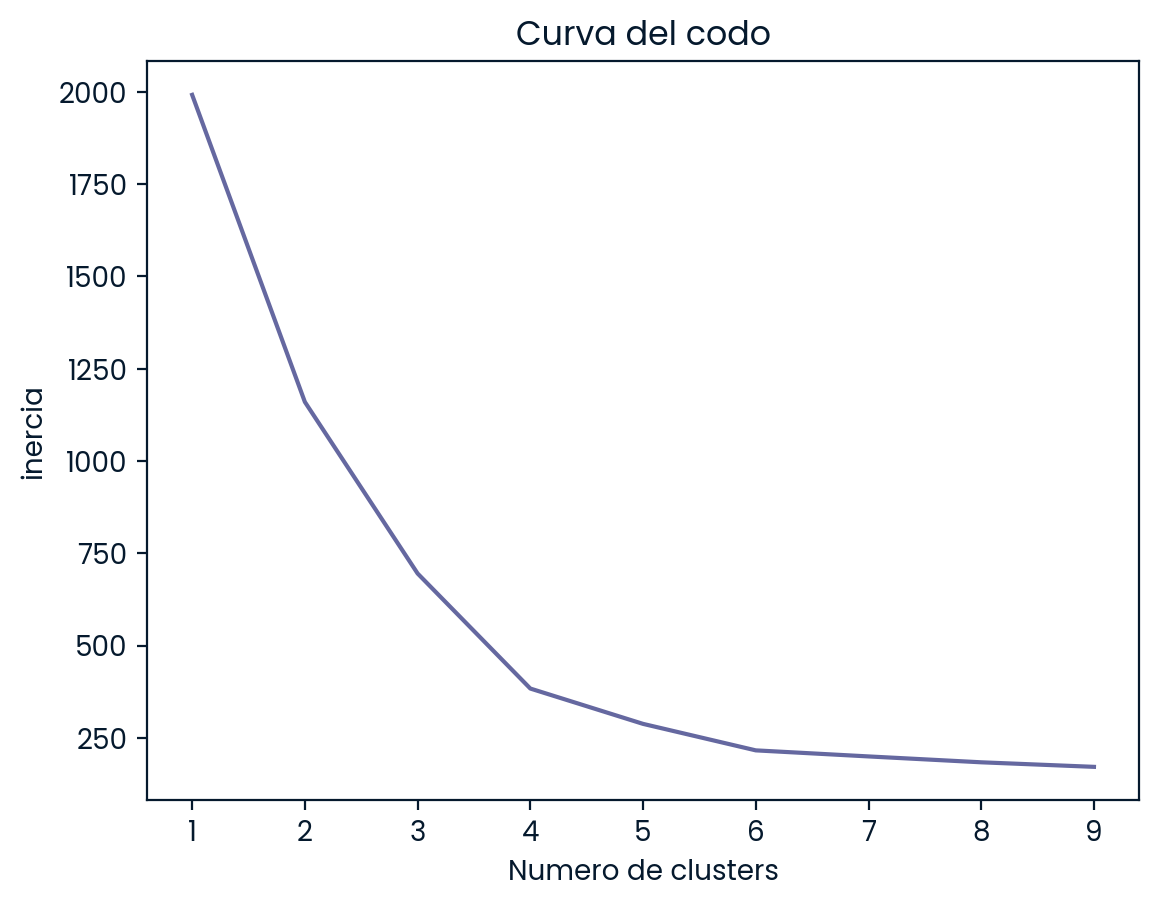

In [63]:
# Hacemos la tecnica del codo para observar cuantos clusters poner
inertia = []
num_clusters = range(1,10)
for i in num_clusters:
    kmeans =  KMeans(n_clusters = i).fit(penguins_procesado)
    inertia.append(kmeans.inertia_)
plt.plot(num_clusters, inertia)
plt.xlabel('Numero de clusters')
plt.ylabel('inercia')
plt.title('Curva del codo')

# Con la curva nos damos cuenta que la inertia del modelo deja de disminuir de manera drastica en el numero 4, por lo tanto decimos que tenemos 4 clusters

# Empezando Clustering

In [79]:
#Modelo de KMeans para agrupar 
kmeans = KMeans(n_clusters = 4).fit(penguins_procesado)
penguins_df['label'] = kmeans.labels_
penguins_procesado['label'] = kmeans.labels_
penguins_df.head()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE,label
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,1,0,0
2,40.3,18.0,195.0,3250.0,1,0,0
3,36.7,19.3,193.0,3450.0,1,0,0
4,39.3,20.6,190.0,3650.0,0,1,1


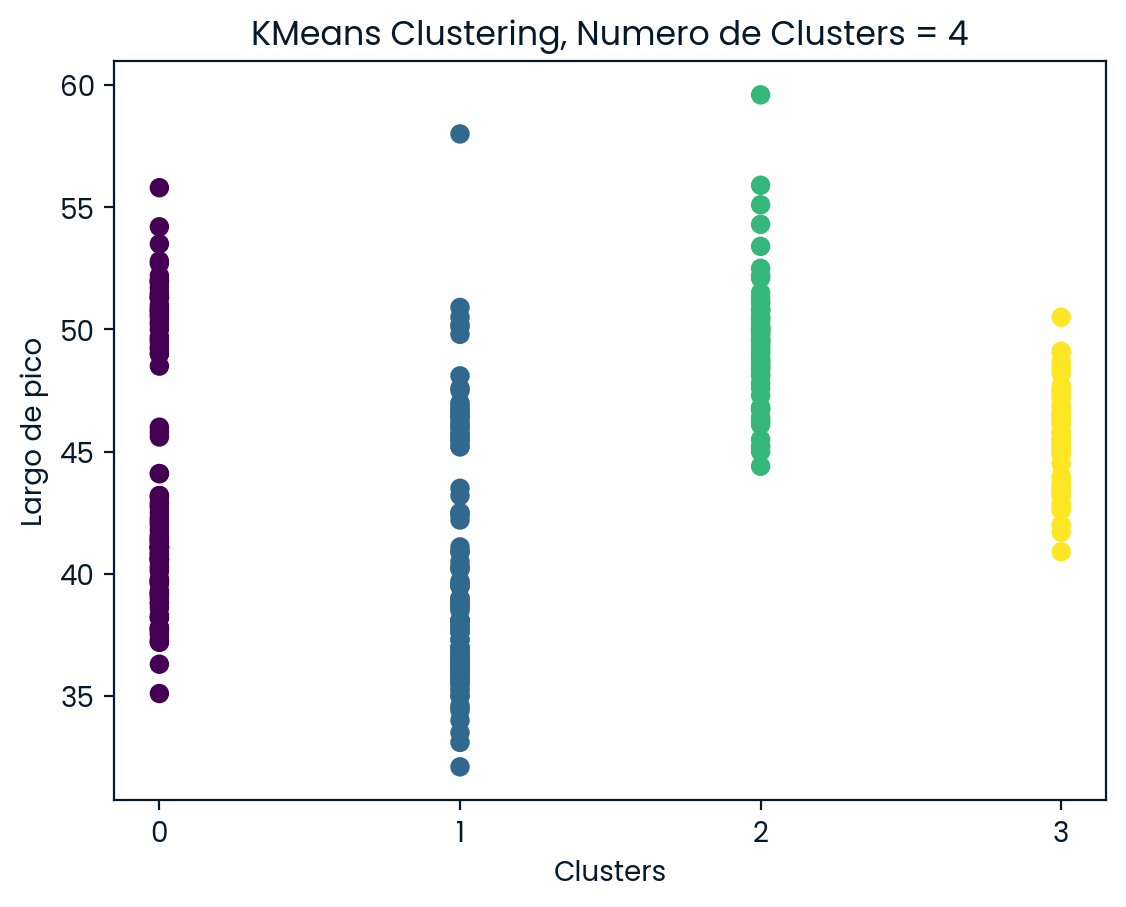

In [69]:
# Graficamos 
plt.scatter(penguins_df['label'], penguins_df['culmen_length_mm'], c=kmeans.labels_)
plt.xlabel('Clusters')
plt.ylabel('Largo de pico')
plt.xticks(range(int(penguins_df['label'].min()), int(penguins_df['label'].max()) + 1))
plt.title('KMeans Clustering, Numero de Clusters = 4')
plt.show()

In [66]:
# Hacemos la tabla final de stat
columnas = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']
stat_penguins = penguins_df[columnas].groupby('label').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,43.878302,19.111321,194.764151
1,40.217757,17.611215,189.046729
2,49.473770,15.718033,221.540984
3,45.563793,14.237931,212.706897


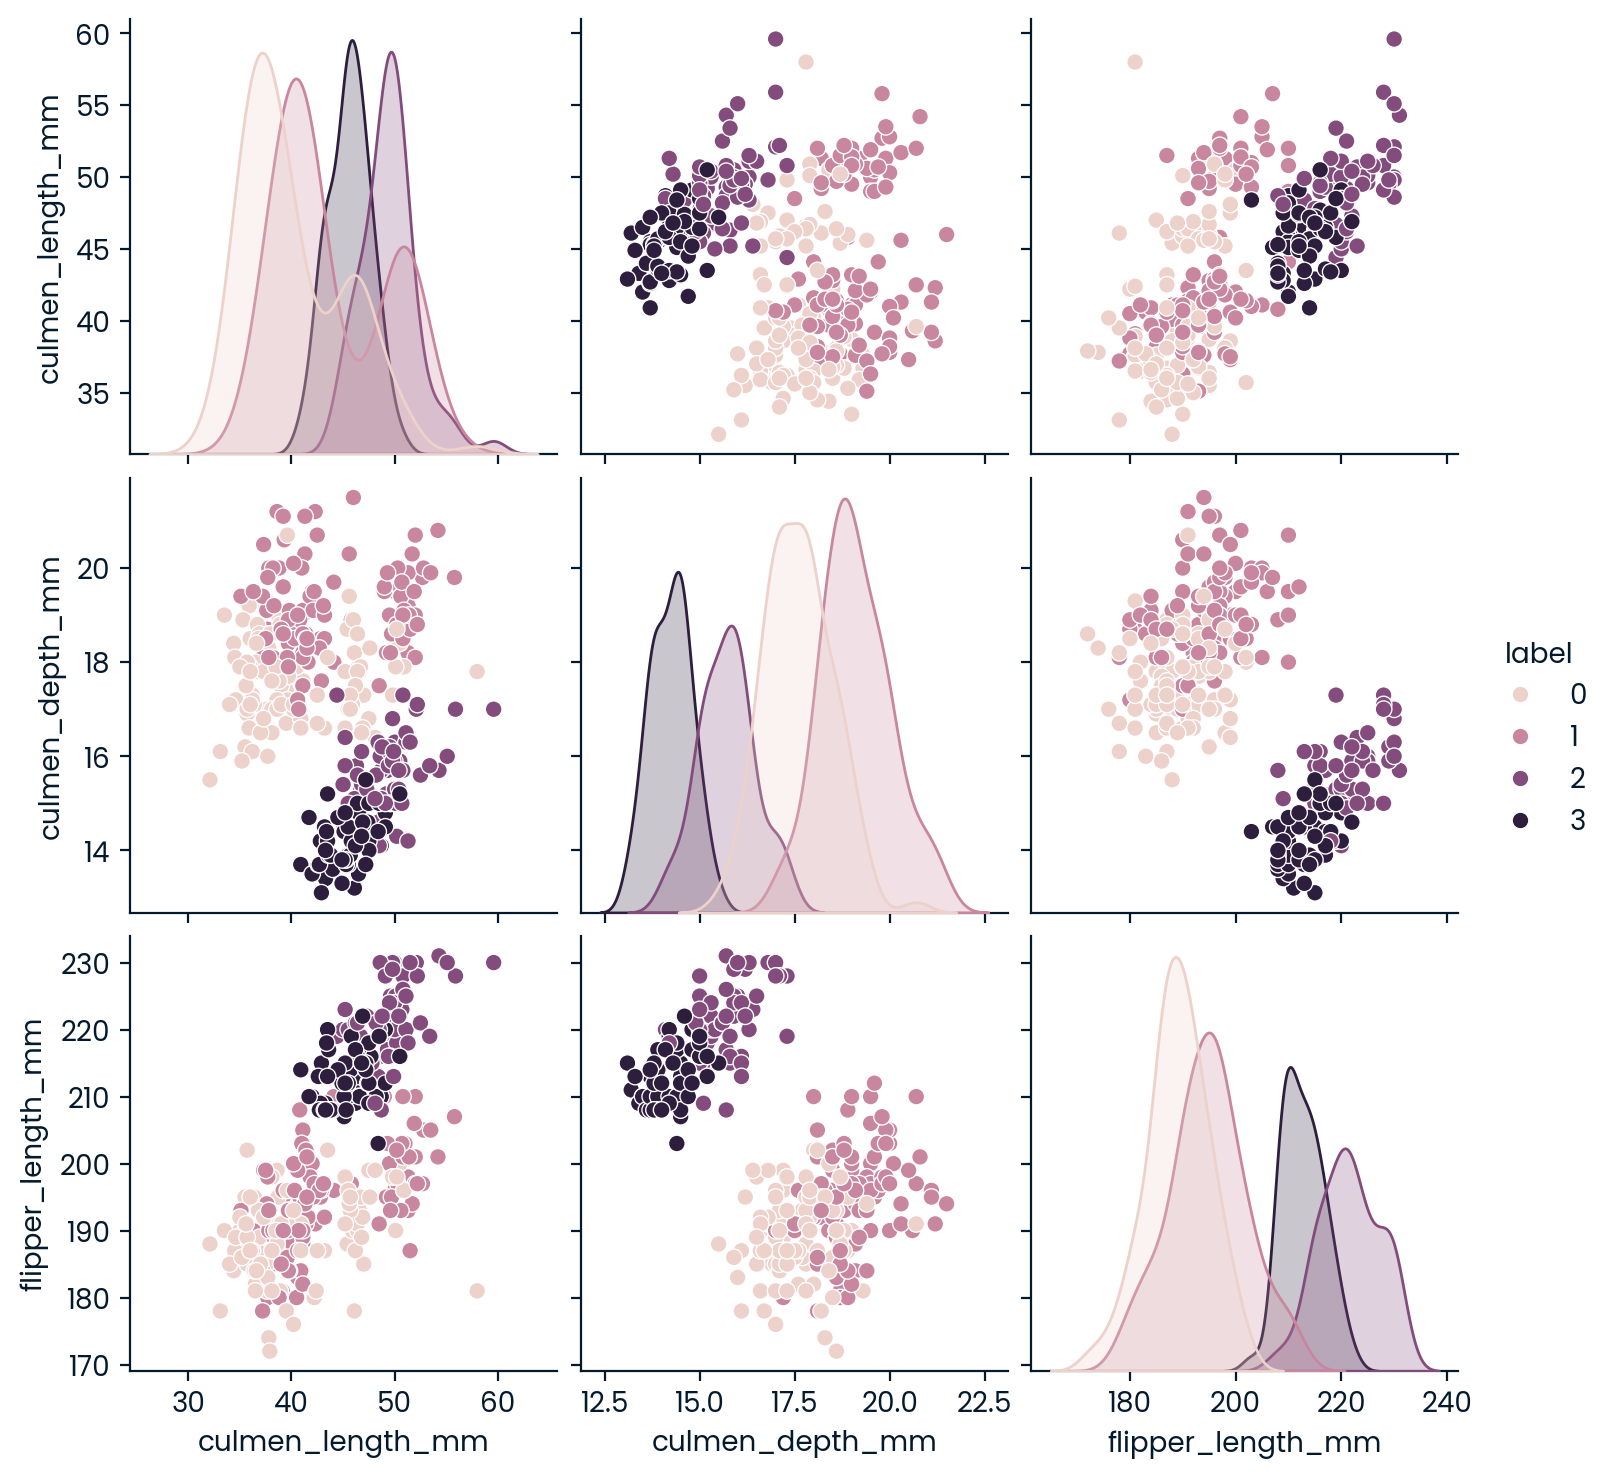

In [81]:
import seaborn as sns
columnas = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']
sns.pairplot(penguins_df[columnas], hue='label')